In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import missingno as msno

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rc('axes', unicode_minus=False) ## 그래프의 음수 표시
df_etch=pd.read_csv("/home/piai/바탕화면/4주차/Etching.csv", encoding ="cp949")
df_etch.head()
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns

In [2]:
df_etch=pd.read_csv("/home/piai/바탕화면/4주차/Etching.csv", encoding ="cp949")
df_etch.head()

,Unnamed: 0,No_Die,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
0,0,NOLSM325131325,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019
1,1,NOLSM326132326,2,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019
2,2,NOLSM327133327,3,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019
3,3,NOLSM328134328,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019
4,4,NOLSM329135329,2,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019


In [3]:
df_etch_modeling = df_etch.drop(['Unnamed: 0','No_Die','Process 3'],axis=1)
df_etch_modeling
df_etch_modeling.drop(index=1107,axis=0,inplace=True)
df_etch_modeling.drop(index=1116,axis=0,inplace=True)

In [4]:
df_etch_modeling

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
0,1,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019
1,2,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019
2,3,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019
3,1,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019
4,2,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...
1699,3,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,32,11,28-02-2019
1700,3,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,32,12,28-02-2019
1701,2,142.0,1472.0,3649.0,5700.0,71.295,50.602,1.015,32,13,28-02-2019
1702,1,127.0,1341.0,3646.0,5722.0,71.199,50.544,1.014,32,14,28-02-2019


In [5]:
ds=df_etch_modeling.groupby(['Datetime', 'Etching_Chamber'])

In [6]:
df_etch_ch1 = df_etch_modeling[df_etch_modeling['Etching_Chamber'] == 1]
df_etch_ch2 = df_etch_modeling[df_etch_modeling['Etching_Chamber'] == 2]
df_etch_ch3 = df_etch_modeling[df_etch_modeling['Etching_Chamber'] == 3]

In [7]:
df_etch.drop(['Unnamed: 0','No_Die','Process 3'],axis=1, inplace=True)
df_etch
df_etch.drop(index=1107,axis=0,inplace=True)
df_etch.drop(index=1161,axis=0,inplace=True)

# ############## 결측치 확인 #####################################

In [8]:
df_etch[(df_etch["Thin F1"]).isnull()]

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
462,1,204.0,1377.0,3642.0,NaN,71.361,52.042,1.051,21,31,17-02-2019
476,3,245.0,1405.0,3636.0,NaN,70.908,50.959,1.038,21,45,17-02-2019
483,1,184.0,1420.0,3635.0,NaN,71.014,51.300,1.032,21,52,17-02-2019
575,3,213.0,1573.0,3641.0,NaN,71.442,51.350,1.047,22,36,18-02-2019


In [9]:
df_etch[(df_etch["Thin F2"]).isnull()]

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime


In [10]:
df_etch[(df_etch["Thin F3"]).isnull()]

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
580,2,122.0,NaN,3635.0,5721.0,71.36,51.265,1.032,22,41,18-02-2019


In [11]:
df_etch[(df_etch["Thin F4"]).isnull()]

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime


# ###############1) 2개 결측치 채움 Etching_Chamber=1, Datetime=17-02-2019####################################

In [12]:
df_etch_ch1 = df_etch[(df_etch['Etching_Chamber'] == 1) & (df_etch['Datetime']=='17-02-2019') & (df_etch["Lot_Num"]==21)]
df_etch_ch1

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
459,1,205.0,1491.0,3641.0,5683.0,71.287,51.867,1.047,21,28,17-02-2019
462,1,204.0,1377.0,3642.0,NaN,71.361,52.042,1.051,21,31,17-02-2019
465,1,204.0,1393.0,3638.0,5706.0,71.540,51.963,1.064,21,34,17-02-2019
468,1,183.0,1417.0,3637.0,5700.0,71.011,52.102,1.043,21,37,17-02-2019
471,1,193.0,1368.0,3634.0,5715.0,71.008,51.179,1.043,21,40,17-02-2019
474,1,218.0,1408.0,3635.0,5711.0,71.055,51.486,1.044,21,43,17-02-2019
477,1,161.0,1371.0,3633.0,5688.0,71.015,51.516,1.041,21,46,17-02-2019
480,1,274.0,1409.0,3644.0,5689.0,70.997,51.454,1.036,21,49,17-02-2019
483,1,184.0,1420.0,3635.0,NaN,71.014,51.300,1.032,21,52,17-02-2019
517,1,277.0,1456.0,3639.0,5706.0,71.269,52.165,1.054,21,5,17-02-2019


In [13]:
df_example = df_etch_ch1.drop(index=462,axis=0)
df_example = df_example.drop(index=483,axis=0)
df_example

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
459,1,205.0,1491.0,3641.0,5683.0,71.287,51.867,1.047,21,28,17-02-2019
465,1,204.0,1393.0,3638.0,5706.0,71.540,51.963,1.064,21,34,17-02-2019
468,1,183.0,1417.0,3637.0,5700.0,71.011,52.102,1.043,21,37,17-02-2019
471,1,193.0,1368.0,3634.0,5715.0,71.008,51.179,1.043,21,40,17-02-2019
474,1,218.0,1408.0,3635.0,5711.0,71.055,51.486,1.044,21,43,17-02-2019
477,1,161.0,1371.0,3633.0,5688.0,71.015,51.516,1.041,21,46,17-02-2019
480,1,274.0,1409.0,3644.0,5689.0,70.997,51.454,1.036,21,49,17-02-2019
517,1,277.0,1456.0,3639.0,5706.0,71.269,52.165,1.054,21,5,17-02-2019
518,1,235.0,1420.0,3643.0,5722.0,71.441,52.573,1.064,21,6,17-02-2019
523,1,227.0,1418.0,3639.0,5726.0,71.062,51.891,1.047,21,11,17-02-2019


In [14]:
rate= sum(df_example["Thin F1"]) / sum(df_example["Thin F2"])
rate

1.5673428723568716

In [15]:

df_etch["Thin F1"].loc[462] = round(df_etch_ch1["Thin F2"].loc[462] * rate, 1)
df_etch["Thin F1"].loc[483] = round(df_etch_ch1["Thin F2"].loc[483] * rate, 1)
df_etch_ch1


,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
459,1,205.0,1491.0,3641.0,5683.0,71.287,51.867,1.047,21,28,17-02-2019
462,1,204.0,1377.0,3642.0,NaN,71.361,52.042,1.051,21,31,17-02-2019
465,1,204.0,1393.0,3638.0,5706.0,71.540,51.963,1.064,21,34,17-02-2019
468,1,183.0,1417.0,3637.0,5700.0,71.011,52.102,1.043,21,37,17-02-2019
471,1,193.0,1368.0,3634.0,5715.0,71.008,51.179,1.043,21,40,17-02-2019
474,1,218.0,1408.0,3635.0,5711.0,71.055,51.486,1.044,21,43,17-02-2019
477,1,161.0,1371.0,3633.0,5688.0,71.015,51.516,1.041,21,46,17-02-2019
480,1,274.0,1409.0,3644.0,5689.0,70.997,51.454,1.036,21,49,17-02-2019
483,1,184.0,1420.0,3635.0,NaN,71.014,51.300,1.032,21,52,17-02-2019
517,1,277.0,1456.0,3639.0,5706.0,71.269,52.165,1.054,21,5,17-02-2019


In [16]:
df_etch_ch3 = df_etch[(df_etch['Etching_Chamber'] == 3) & (df_etch['Datetime']=='17-02-2019') & (df_etch["Lot_Num"]==21)]
df_etch_ch3

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
461,3,174.0,1448.0,3637.0,5706.0,71.516,51.977,1.049,21,30,17-02-2019
464,3,235.0,1420.0,3643.0,5722.0,71.441,50.912,1.064,21,33,17-02-2019
467,3,144.0,1471.0,3640.0,5685.0,71.430,50.718,1.056,21,36,17-02-2019
470,3,270.0,1476.0,3643.0,5686.0,71.163,50.849,1.046,21,39,17-02-2019
473,3,138.0,1398.0,3633.0,5722.0,70.991,51.828,1.048,21,42,17-02-2019
476,3,245.0,1405.0,3636.0,NaN,70.908,50.959,1.038,21,45,17-02-2019
479,3,193.0,1413.0,3634.0,5683.0,70.978,51.567,1.039,21,48,17-02-2019
482,3,243.0,1394.0,3639.0,5694.0,70.998,51.442,1.036,21,51,17-02-2019
485,3,217.0,1382.0,3641.0,5726.0,71.073,51.277,1.032,21,54,17-02-2019
514,3,215.0,1406.0,3643.0,5703.0,71.603,52.199,1.055,21,2,17-02-2019


In [17]:
df_example2 = df_etch_ch3.drop(index=476,axis=0)
df_example2

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
461,3,174.0,1448.0,3637.0,5706.0,71.516,51.977,1.049,21,30,17-02-2019
464,3,235.0,1420.0,3643.0,5722.0,71.441,50.912,1.064,21,33,17-02-2019
467,3,144.0,1471.0,3640.0,5685.0,71.430,50.718,1.056,21,36,17-02-2019
470,3,270.0,1476.0,3643.0,5686.0,71.163,50.849,1.046,21,39,17-02-2019
473,3,138.0,1398.0,3633.0,5722.0,70.991,51.828,1.048,21,42,17-02-2019
479,3,193.0,1413.0,3634.0,5683.0,70.978,51.567,1.039,21,48,17-02-2019
482,3,243.0,1394.0,3639.0,5694.0,70.998,51.442,1.036,21,51,17-02-2019
485,3,217.0,1382.0,3641.0,5726.0,71.073,51.277,1.032,21,54,17-02-2019
514,3,215.0,1406.0,3643.0,5703.0,71.603,52.199,1.055,21,2,17-02-2019
515,3,174.0,1448.0,3637.0,5706.0,71.516,51.977,1.049,21,3,17-02-2019


In [18]:
rate= sum(df_example2["Thin F1"]) / sum(df_example2["Thin F2"])
rate

1.566586896061057

In [19]:
df_etch["Thin F1"].loc[476] = round(df_etch_ch3["Thin F2"].loc[476] * rate, 1)


In [20]:
df_etch_ch3= df_etch[(df_etch['Etching_Chamber'] == 3) & (df_etch['Datetime']=='18-02-2019') & (df_etch["Lot_Num"]==22)]

In [21]:
df_etch_ch3

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
569,3,245.0,1709.0,3641.0,5719.0,71.239,51.495,1.047,22,30,18-02-2019
572,3,253.0,1390.0,3642.0,5730.0,71.366,51.581,1.047,22,33,18-02-2019
575,3,213.0,1573.0,3641.0,NaN,71.442,51.350,1.047,22,36,18-02-2019
578,3,143.0,1588.0,3640.0,5715.0,71.519,51.449,1.053,22,39,18-02-2019
581,3,265.0,1402.0,3641.0,5713.0,71.327,51.141,1.029,22,42,18-02-2019
584,3,192.0,1376.0,3634.0,5725.0,71.081,50.912,1.035,22,45,18-02-2019
587,3,170.0,1392.0,3640.0,5710.0,71.304,50.718,1.036,22,48,18-02-2019
590,3,277.0,1346.0,3642.0,5726.0,71.220,50.849,1.029,22,51,18-02-2019
593,3,161.0,1471.0,3639.0,5691.0,71.276,51.828,1.031,22,54,18-02-2019
623,3,245.0,1500.0,3641.0,5719.0,71.239,51.495,1.037,22,3,18-02-2019


In [22]:
df_example3 = df_etch_ch3.drop(index=575,axis=0)
df_example3

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
569,3,245.0,1709.0,3641.0,5719.0,71.239,51.495,1.047,22,30,18-02-2019
572,3,253.0,1390.0,3642.0,5730.0,71.366,51.581,1.047,22,33,18-02-2019
578,3,143.0,1588.0,3640.0,5715.0,71.519,51.449,1.053,22,39,18-02-2019
581,3,265.0,1402.0,3641.0,5713.0,71.327,51.141,1.029,22,42,18-02-2019
584,3,192.0,1376.0,3634.0,5725.0,71.081,50.912,1.035,22,45,18-02-2019
587,3,170.0,1392.0,3640.0,5710.0,71.304,50.718,1.036,22,48,18-02-2019
590,3,277.0,1346.0,3642.0,5726.0,71.220,50.849,1.029,22,51,18-02-2019
593,3,161.0,1471.0,3639.0,5691.0,71.276,51.828,1.031,22,54,18-02-2019
623,3,245.0,1500.0,3641.0,5719.0,71.239,51.495,1.037,22,3,18-02-2019
624,3,204.0,1383.0,3640.0,5699.0,71.296,51.450,1.036,22,4,18-02-2019


In [23]:
rate= sum(df_example3["Thin F1"]) / sum(df_example3["Thin F2"])
rate

1.5691981963053352

In [24]:
df_etch["Thin F1"].loc[575] = round(df_etch_ch3["Thin F2"].loc[575] * rate, 1)

In [25]:
df_etch.isna().sum()

Etching_Chamber    0
Thin F4            0
Thin F3            1
Thin F2            0
Thin F1            0
Temp_Etching       0
Source_Power       0
Selectivity        0
Lot_Num            0
Wafer_Num          0
Datetime           0
dtype: int64

In [26]:
df_etch_f3 = df_etch[(df_etch['Etching_Chamber'] == 2) & (df_etch['Datetime']=='18-02-2019') & (df_etch["Lot_Num"]==22)]

In [27]:
df_etch_f3

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
568,2,194.0,1397.0,3641.0,5714.0,71.161,51.463,1.037,22,29,18-02-2019
571,2,192.0,1466.0,3638.0,5713.0,71.324,51.567,1.048,22,32,18-02-2019
574,2,172.0,1665.0,3635.0,5723.0,71.361,51.396,1.046,22,35,18-02-2019
577,2,182.0,1481.0,3640.0,5690.0,71.323,51.566,1.052,22,38,18-02-2019
580,2,122.0,NaN,3635.0,5721.0,71.360,51.265,1.032,22,41,18-02-2019
583,2,187.0,1472.0,3635.0,5695.0,71.107,51.600,1.040,22,44,18-02-2019
586,2,206.0,1422.0,3639.0,5711.0,71.276,53.272,1.037,22,47,18-02-2019
589,2,213.0,1477.0,3641.0,5714.0,71.358,50.724,1.031,22,50,18-02-2019
592,2,203.0,1464.0,3640.0,5708.0,71.376,51.177,1.029,22,53,18-02-2019
622,2,194.0,1397.0,3641.0,5714.0,71.161,51.463,1.037,22,2,18-02-2019


In [28]:
df_example_f3 = df_etch_f3.drop(index=580,axis=0)
df_example_f3


,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
568,2,194.0,1397.0,3641.0,5714.0,71.161,51.463,1.037,22,29,18-02-2019
571,2,192.0,1466.0,3638.0,5713.0,71.324,51.567,1.048,22,32,18-02-2019
574,2,172.0,1665.0,3635.0,5723.0,71.361,51.396,1.046,22,35,18-02-2019
577,2,182.0,1481.0,3640.0,5690.0,71.323,51.566,1.052,22,38,18-02-2019
583,2,187.0,1472.0,3635.0,5695.0,71.107,51.600,1.040,22,44,18-02-2019
586,2,206.0,1422.0,3639.0,5711.0,71.276,53.272,1.037,22,47,18-02-2019
589,2,213.0,1477.0,3641.0,5714.0,71.358,50.724,1.031,22,50,18-02-2019
592,2,203.0,1464.0,3640.0,5708.0,71.376,51.177,1.029,22,53,18-02-2019
622,2,194.0,1397.0,3641.0,5714.0,71.161,51.463,1.037,22,2,18-02-2019
625,2,192.0,1361.0,3638.0,5713.0,71.324,51.567,1.039,22,5,18-02-2019


In [29]:
rate= sum(df_example_f3["Thin F3"]) / sum(df_example_f3["Thin F4"])
rate

7.312575210589651

In [30]:
df_etch["Thin F3"].loc[580] = round(df_etch_f3["Thin F4"].loc[580] * rate, 1)
df_etch

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
0,1,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019
1,2,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019
2,3,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019
3,1,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019
4,2,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...
1699,3,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,32,11,28-02-2019
1700,3,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,32,12,28-02-2019
1701,2,142.0,1472.0,3649.0,5700.0,71.295,50.602,1.015,32,13,28-02-2019
1702,1,127.0,1341.0,3646.0,5722.0,71.199,50.544,1.014,32,14,28-02-2019


In [31]:
df_etch

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime
0,1,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019
1,2,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019
2,3,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019
3,1,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019
4,2,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019
...,...,...,...,...,...,...,...,...,...,...,...
1699,3,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,32,11,28-02-2019
1700,3,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,32,12,28-02-2019
1701,2,142.0,1472.0,3649.0,5700.0,71.295,50.602,1.015,32,13,28-02-2019
1702,1,127.0,1341.0,3646.0,5722.0,71.199,50.544,1.014,32,14,28-02-2019


In [32]:
df_etch.insert(11,"etching_rate_total",(df_etch["Thin F1"]- df_etch["Thin F4"])/30)
df_etch

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime,etching_rate_total
0,1,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019,179.733333
1,2,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019,182.133333
2,3,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019,177.266667
3,1,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019,179.666667
4,2,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019,183.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,3,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,32,11,28-02-2019,184.966667
1700,3,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,32,12,28-02-2019,183.666667
1701,2,142.0,1472.0,3649.0,5700.0,71.295,50.602,1.015,32,13,28-02-2019,185.266667
1702,1,127.0,1341.0,3646.0,5722.0,71.199,50.544,1.014,32,14,28-02-2019,186.500000


In [33]:
df_etch.insert(12,"etching_rate_10_20", (df_etch["Thin F1"]- df_etch["Thin F2"])/10)
df_etch.insert(13,"etching_rate_20_30", (df_etch["Thin F2"]- df_etch["Thin F3"])/10)
df_etch.insert(14,"etching_rate_30_40", (df_etch["Thin F3"]- df_etch["Thin F4"])/10)
df_etch

,Etching_Chamber,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Datetime,etching_rate_total,etching_rate_10_20,etching_rate_20_30,etching_rate_30_40
0,1,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,13,28,01-03-2019,179.733333,208.8,212.2,118.2
1,2,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,13,29,01-03-2019,182.133333,209.8,211.8,124.8
2,3,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,13,30,01-03-2019,177.266667,207.6,208.5,115.7
3,1,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,13,31,01-03-2019,179.666667,205.7,233.5,99.8
4,2,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,13,32,01-03-2019,183.666667,209.2,218.6,123.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,3,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,32,11,28-02-2019,184.966667,207.1,214.5,133.3
1700,3,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,32,12,28-02-2019,183.666667,204.7,221.0,125.3
1701,2,142.0,1472.0,3649.0,5700.0,71.295,50.602,1.015,32,13,28-02-2019,185.266667,205.1,217.7,133.0
1702,1,127.0,1341.0,3646.0,5722.0,71.199,50.544,1.014,32,14,28-02-2019,186.500000,207.6,230.5,121.4


In [34]:
df_etch_boxplot= df_etch.drop([ "Etching_Chamber","Thin F4", "Thin F3", "Thin F2", "Thin F1", "Temp_Etching", "Source_Power","Selectivity","Lot_Num","Wafer_Num","Datetime"],axis=1)

<AxesSubplot:>

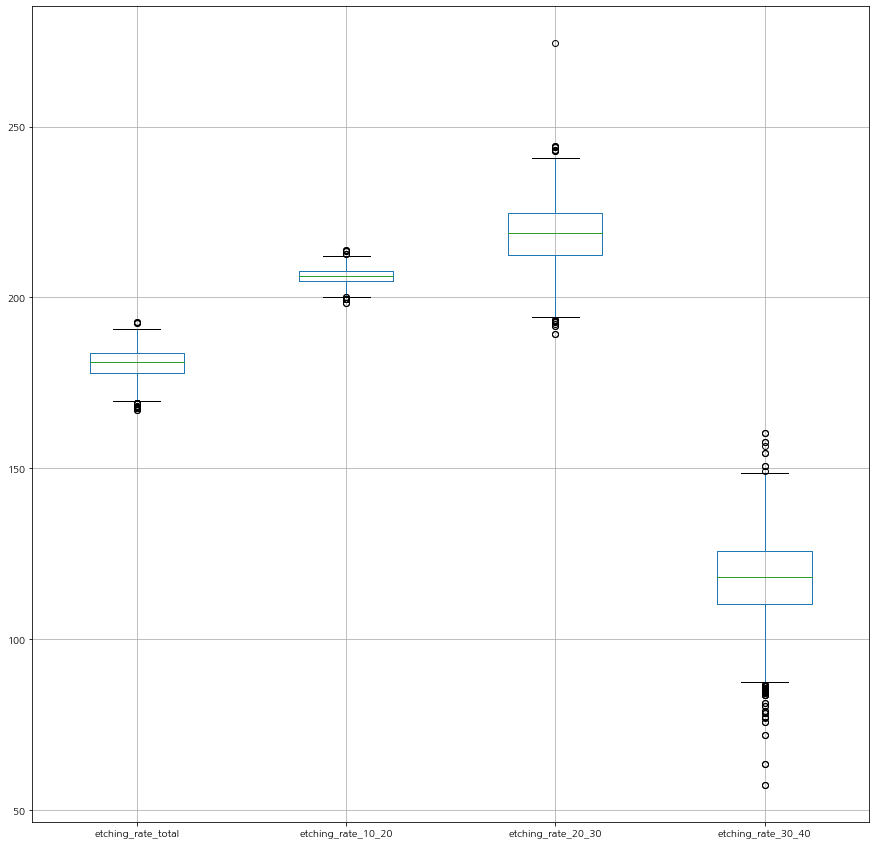

In [35]:
df_etch_boxplot.boxplot(figsize = (15,15))